# Running MoCHI on doubles dataset - *all variants*

1. Allowing for 1st order terms only
2. Fitting the following functions for now: Linear, Sigmoid, and ELU
3. `l2_regularization_factor` = 10^(-5)
4. Running a joint model and separate per dataset models


Using **all variants** from the files given to me by Benni: 

File (a): `mochi_eLife_doubles_all_variants_corrected.tsv`

File (b): `mochi_NNK_doubles_all_variants_corrected.tsv`

File (c): `mochi_Nicking_doubles_all_variants_corrected.tsv`


19.02.2024

In [1]:
import pymochi
from pymochi.data import MochiData
from pymochi.models import MochiTask
from pymochi.project import MochiProject
from pymochi.report import MochiReport
import pandas as pd
import numpy as np

In [2]:
%%bash

pip freeze

alembic==1.7.5
anndata==0.7.8
annoy==1.17.0
anyio==3.5.0
aquirdturtle-collapsible-headings==3.1.0
argcomplete==2.0.0
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
async-generator==1.10
attrs==21.4.0
Babel==2.9.1
backcall==0.2.0
bash_kernel==0.7.2
# Editable Git install with no remote (batchspawner==1.1.1.dev0)
-e /software/isg/languages/Python-3.9.10/src/batchspawner
bleach==4.1.0
cached-property==1.5.2
certifi==2021.10.8
certipy==0.1.3
cffi==1.15.0
charset-normalizer==2.0.10
chart-studio==1.1.0
colorclass==2.2.2
cryptography==36.0.1
cycler==0.11.0
Cython==0.29.27
debugpy==1.5.1
decorator==5.1.1
defusedxml==0.7.1
docopt==0.6.2
entrypoints==0.3
fonttools==4.28.5
greenlet==1.1.2
h5py==3.6.0
idna==3.3
imageio==2.15.0
importlib-metadata==4.10.0
importlib-resources==5.4.0
ipykernel==6.6.1
ipython==7.31.0
ipython-genutils==0.2.0
ipywidgets==7.6.5
jedi==0.18.1
Jinja2==3.0.3
joblib==1.1.0
json5==0.9.6
jsonschema==4.3.3
julia==0.5.7
jupyter==1.0.0
jupyter-client==7.1.0
jupyter-console==6.4.0

In [3]:
%%bash

#!/usr/bin/env

pwd


/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Doubles_analysis/all_vars_analysis


In [4]:
filedir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Previous_files_from_Mireia/Doubles_datasets/dimsum_outputs/corrected_fitness_abundance_files_Anna/'
filenames = ['mochi_eLife_doubles_all_variants_corrected.tsv',
             'mochi_NNK_doubles_all_variants_corrected.tsv',
             'mochi_Nicking_doubles_all_variants_corrected.tsv']

output_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Doubles_analysis/all_vars_analysis/mochi_results/'

In [5]:
# For joint modelling making sure to comlement the full Ab sequence in NNK and Nicking datasets

all_vars = {}

all_vars['eLife'] = pd.read_csv(filedir + filenames[0], sep='\t')
all_vars['NNK'] = pd.read_csv(filedir + filenames[1], sep='\t')
all_vars['Nicking'] = pd.read_csv(filedir + filenames[2], sep='\t')


In [6]:
np.unique([len(seq) for seq in all_vars['eLife']['aa_seq']])

array([42])

In [7]:
# here we need to add WT N-terminus (aa1-27) to the begining
np.unique([len(seq) for seq in all_vars['NNK']['aa_seq']])

array([15])

In [8]:
# here we need to add WT C-terminus (aa29-42) to the end
np.unique([len(seq) for seq in all_vars['Nicking']['aa_seq']])

array([28])

In [9]:
AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"

In [10]:
len(AB_WT)

42

In [11]:
len(AB_WT[:27])

27

In [12]:
# here we need to add WT N-terminus (aa1-27) to the beginning

all_vars['NNK']['aa_seq'] = [AB_WT[:27] + seq for seq in all_vars['NNK']['aa_seq']]

In [13]:
np.unique([len(seq) for seq in all_vars['NNK']['aa_seq']])

array([42])

In [14]:
len(AB_WT[28:])

14

In [15]:
# here we need to add WT C-terminus (aa29-42) to the end

all_vars['Nicking']['aa_seq'] = [seq + AB_WT[28:] for seq in all_vars['Nicking']['aa_seq']]

In [16]:
np.unique([len(seq) for seq in all_vars['Nicking']['aa_seq']])

array([42])

In [17]:
all_vars['Nicking']

,aa_seq,Nham_aa,WT,fitness,sigma
0,KAETRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,0.223002,0.265464
1,KAEFIHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,-2.233137,2.468575
2,KAEFRTDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,0.197959,0.750978
3,KAEFRMDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,-1.540592,2.886249
4,KAEFRQDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,-0.828119,2.569098
...,...,...,...,...,...
54704,FAEFEHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,-0.901118,0.331994
54705,FAEFAHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,-0.449397,2.358081
54706,FAEFGHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,-1.515580,0.614034
54707,FAEFVHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,NaN,-1.594302,0.860002


In [22]:
np.unique([str(elem) for elem in all_vars['Nicking']['WT']], return_counts=True)

(array(['True', 'nan'], dtype='<U4'), array([    1, 54708]))

In [18]:
# now save these tables 
#all_vars['NNK'].to_csv(filedir + 'mochi_NNK_doubles_all_variants_corrected_Ab_complemented.tsv')
#all_vars['Nicking'].to_csv(filedir + 'mochi_Nicking_doubles_all_variants_corrected_Ab_complemented.tsv')


In [25]:
datasets = ['eLife','NNK','Nicking']
all_vars_copy = all_vars.copy()

In [30]:
for dataset in datasets:
    print(dataset)
    all_vars_copy[dataset]['WT_str'] = [str(elem) for elem in all_vars_copy[dataset]['WT']]
    print(all_vars_copy[dataset][all_vars_copy[dataset]['WT_str'] == 'True'])

eLife
                                         aa_seq  Nham_aa    WT   fitness  \
424  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0  True -0.254861   

        sigma WT_str  
424  0.465475   True  
NNK
                                           aa_seq  Nham_aa    WT   fitness  \
14287  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0  True  0.015158   

          sigma WT_str  
14287  0.202355   True  
Nicking
                                           aa_seq  Nham_aa    WT   fitness  \
12033  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0  True  0.123825   

          sigma WT_str  
12033  0.219638   True  


In [31]:
'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA' == 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'

True

In [32]:
'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA' == 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'

True

In [29]:
np.unique(all_vars_copy['Nicking']['WT_str'], return_counts=True)

(array(['True', 'nan'], dtype=object), array([    1, 54708]))

In [33]:
# fAD mutations
fAD_mutations = ['H6R','D7N','D7H','E11K','K16Q','L17V','A21G','E22G','E22K','E22Q','D23N','L34V','A42T']

In [20]:
# setting l2_regularization_factor to 10^(-5)
l2_regularization_factor_values = [0.00001]

In [21]:
filedir + filenames[0]

'/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Previous_files_from_Mireia/Doubles_datasets/dimsum_outputs/corrected_fitness_abundance_files_Anna/mochi_eLife_doubles_all_variants_corrected.tsv'

# Fitting a joint model first

N_max_interaction_order 1
Transformation: Sigmoid
l2_regularization_factor_value: 1e-05
Loading fitness data
One-hot encoding sequence features
One-hot encoding interaction features
Defining cross-validation groups
Defining coefficient groups
Done!
Performing grid search...
Fitting model:
{'fold': 1, 'seed': 1, 'grid_search': True, 'batch_size': 512, 'learn_rate': 0.05, 'num_epochs': 1000, 'num_epochs_grid': 100, 'l1_regularization_factor': 0.0, 'l2_regularization_factor': 1e-05, 'training_resample': True, 'early_stopping': True, 'scheduler_gamma': 0.98, 'scheduler_epochs': 10, 'loss_function_name': 'WeightedL1', 'sos_architecture': [5], 'sos_outputlinear': False}
Epoch 1; Avg_val_loss: 0.9872; WTcoef_1: -0.1159; WTres_1: 0.8302; WTres_2: 1.6881; WTres_3: 1.2199; 
Epoch 11; Avg_val_loss: 0.9135; WTcoef_1: 0.7855; WTres_1: -0.0718; WTres_2: -0.1417; WTres_3: 0.0830; 
Epoch 21; Avg_val_loss: 0.9110; WTcoef_1: 0.8747; WTres_1: -0.2011; WTres_2: -0.2076; WTres_3: -0.0502; 
Epoch 31; Avg_va

/software/team354/MoCHI/pymochi/report.py:148: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()  # Create a figure containing a single axes.


Done with l2_regularization_factor_value 1e-05 
 ################
Done with transformation Linear 
 ################
Done with n_max_interaction_order 1 
 ################


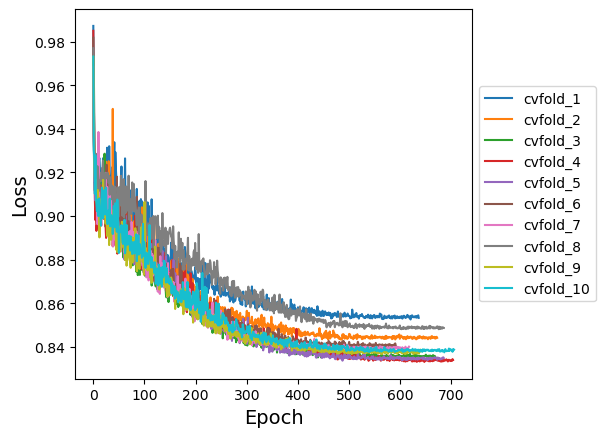

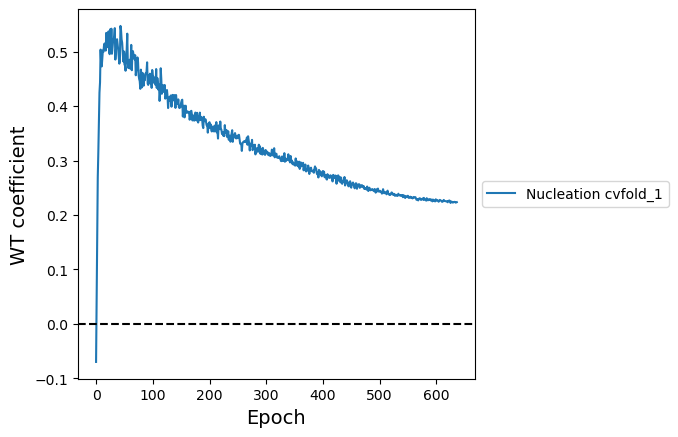

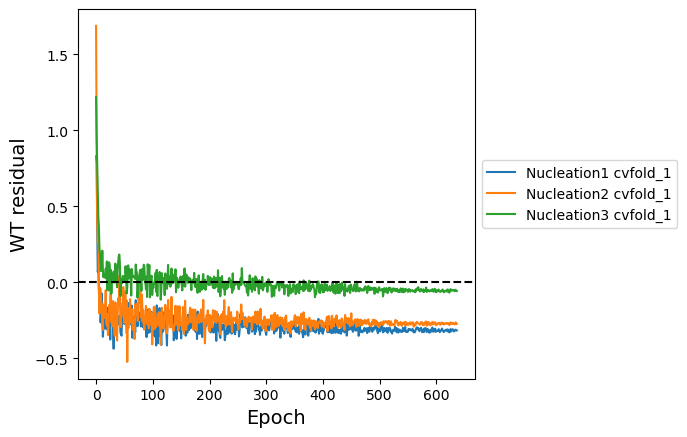

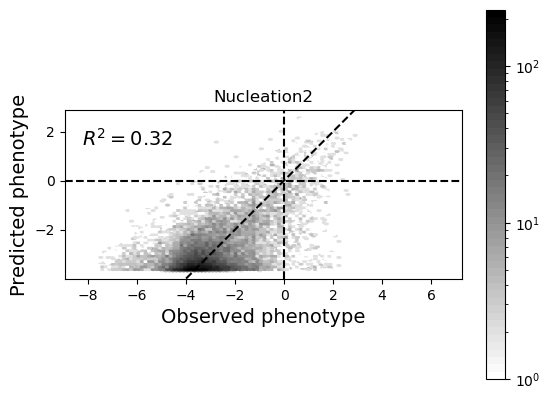

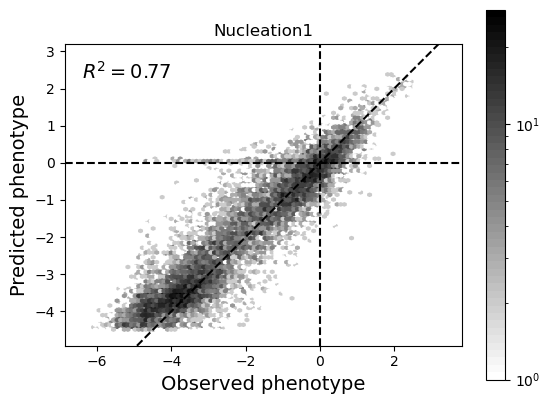

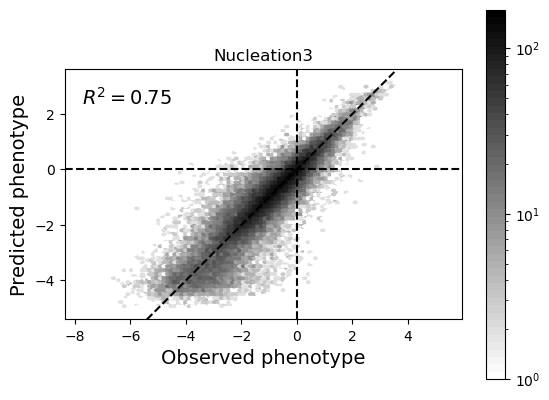

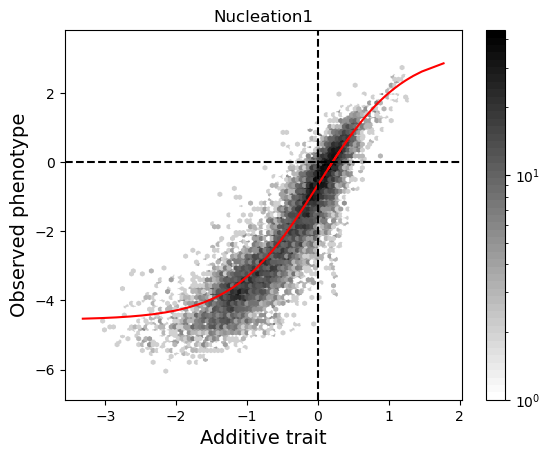

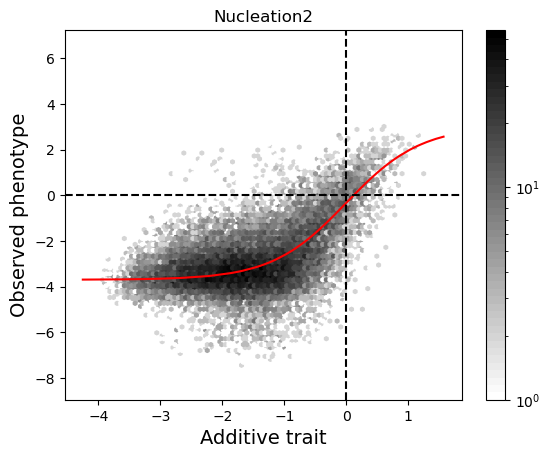

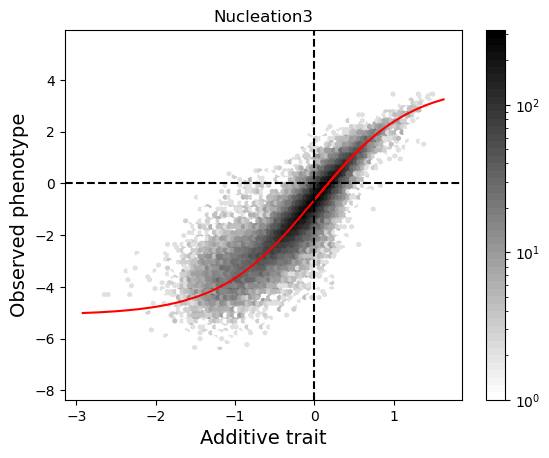

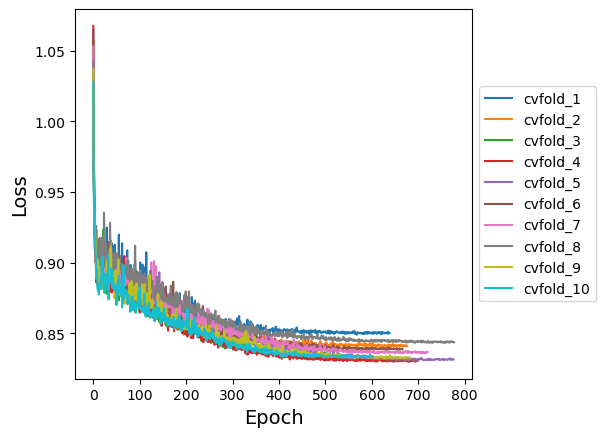

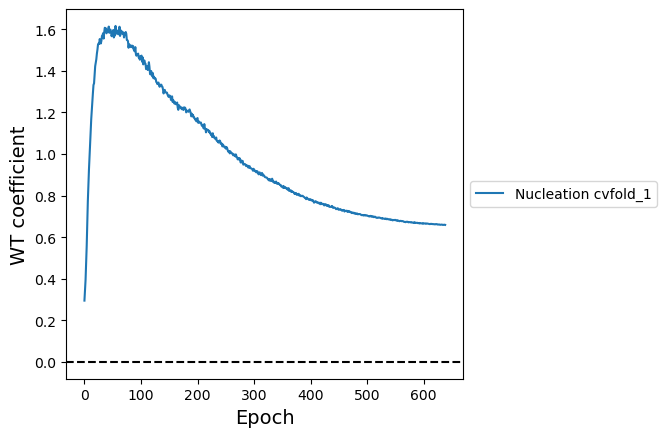

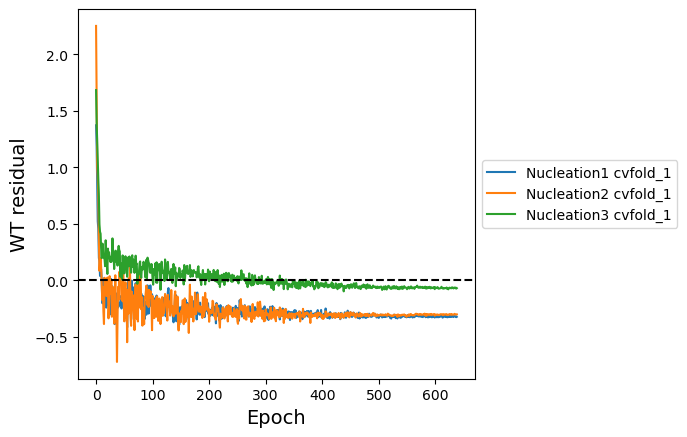

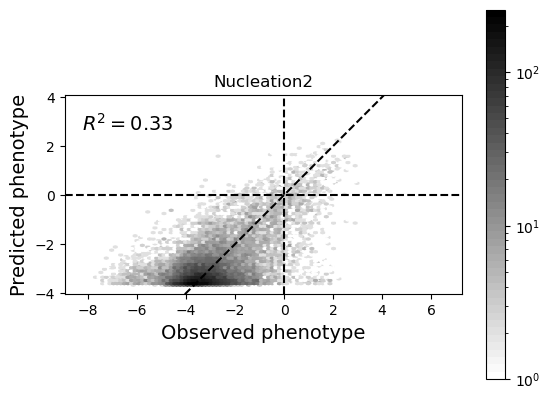

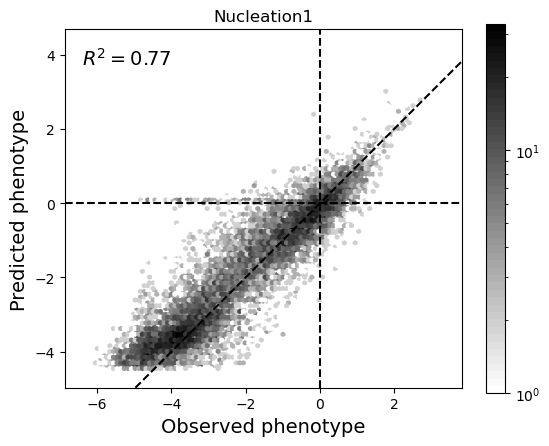

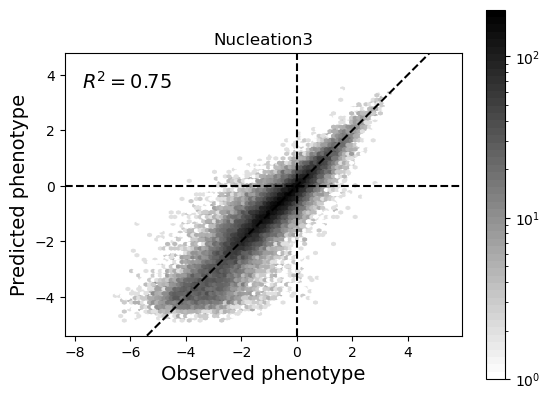

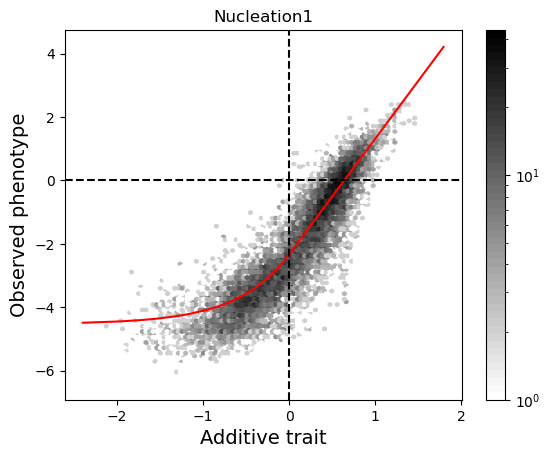

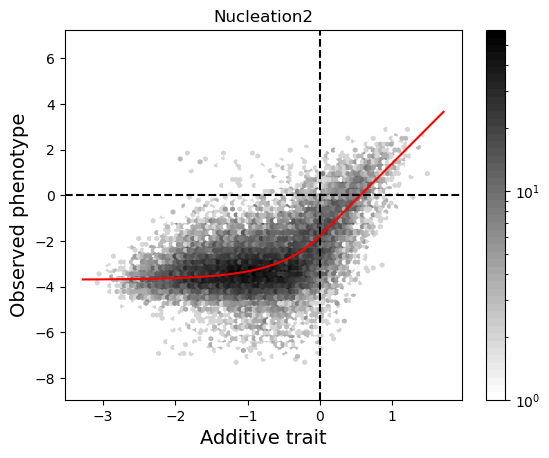

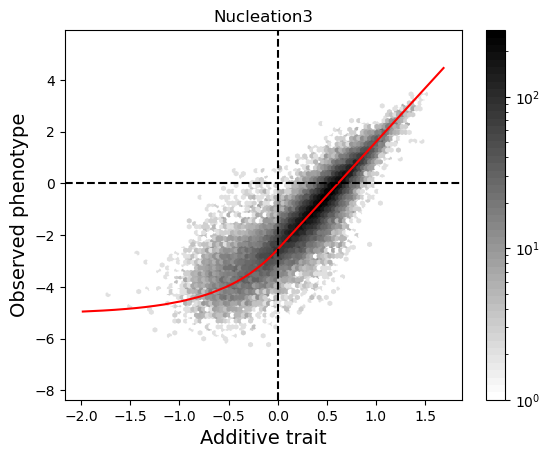

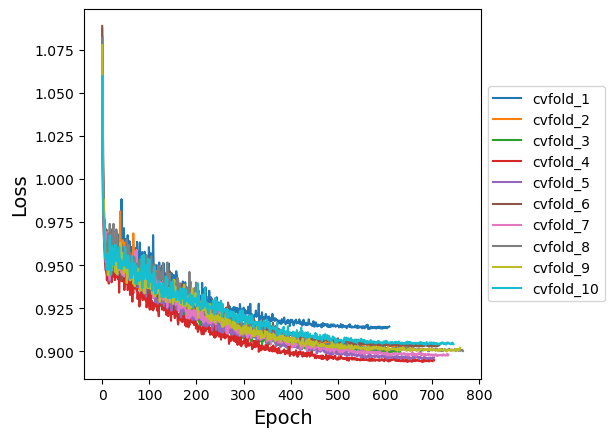

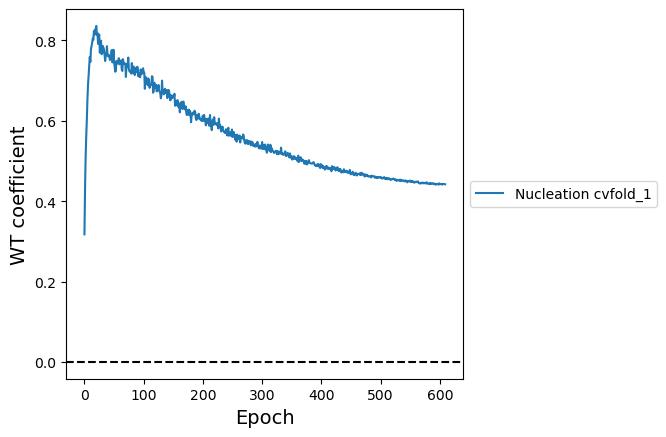

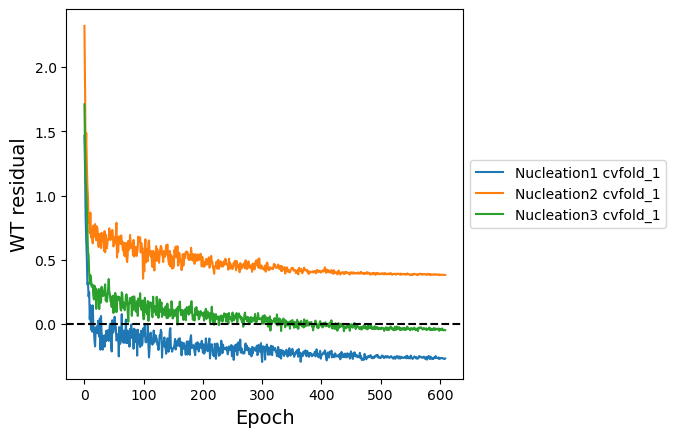

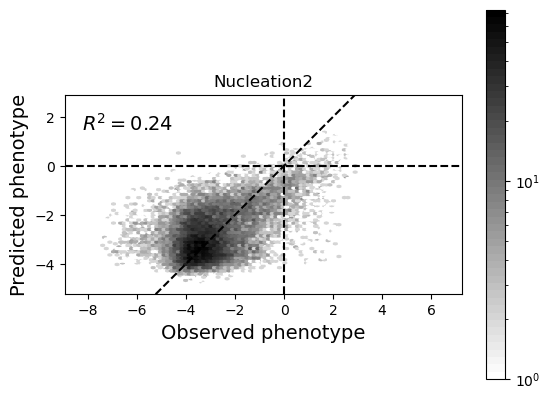

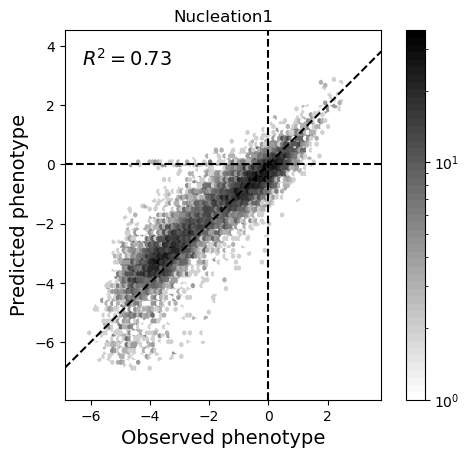

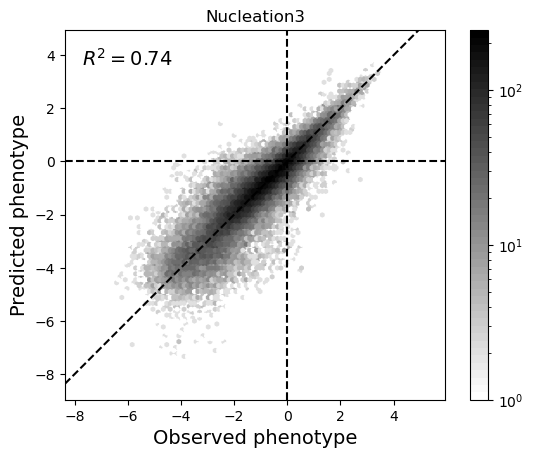

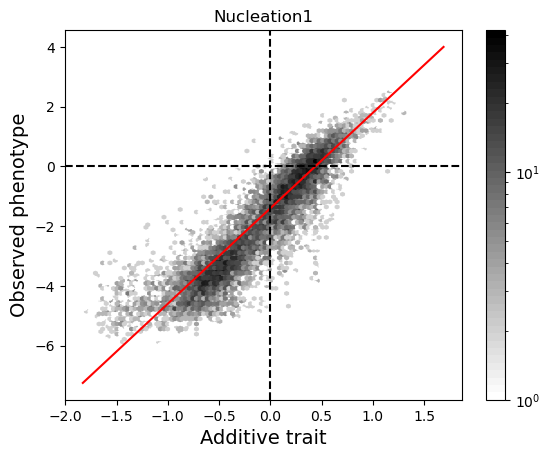

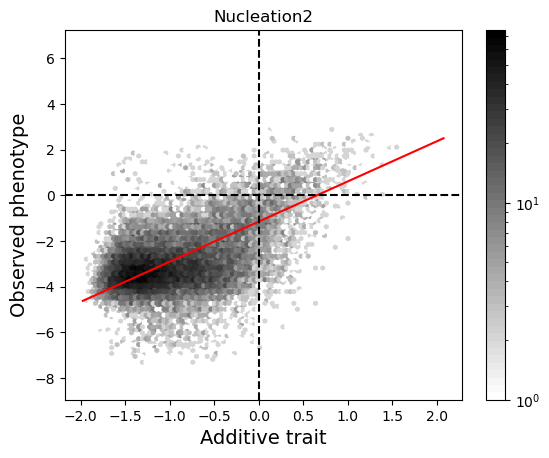

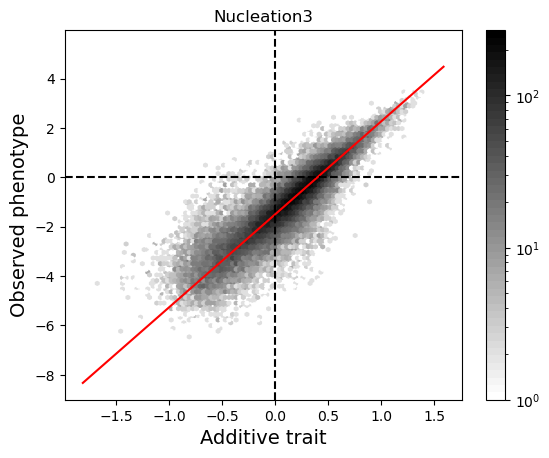

In [23]:
# started at 13:58
# overall 3 models to fit (3 function fits)
# with 64 Gb of RAM and 8 CPU cores
# using 80 Gb GPU RAM

k_folds = 10

transformations = ['Sigmoid', 'ELU', 'Linear'] 

N_max_interaction_order = [1]


for n_max_interaction_order in N_max_interaction_order:
    print('N_max_interaction_order', n_max_interaction_order)
    
    for transformation in transformations:
        print('Transformation:', transformation)
        
        for l2_regularization_factor_value in l2_regularization_factor_values:
            print('l2_regularization_factor_value:', l2_regularization_factor_value)

            my_model_design = pd.DataFrame({
                   'phenotype': ['Nucleation1', 'Nucleation2', 'Nucleation3'],

                    # transformation can be one of: Linear, ReLU, SiLU, Sigmoid, SumOfSigmoids, 
                    #                               TwoStateFractionFolded, ThreeStateFractionFolded, FourStateFractionFolded

                   'transformation': [transformation, transformation, transformation], 
                   'trait': ['Nucleation', 'Nucleation', 'Nucleation'],
                   'file': [filedir + filenames[0], # eLife dataset
                            filedir + 'mochi_NNK_doubles_all_variants_corrected_Ab_complemented.tsv', # NNK datasets
                            filedir + 'mochi_Nicking_doubles_all_variants_corrected_Ab_complemented.tsv' # Nicking dataset
                           ]})

            mochi_project = MochiTask(
                   directory = output_dir + '20240219_max_terms_order_' + str(n_max_interaction_order) + '_' + transformation + '_l2_regularization_factor_' + str(l2_regularization_factor_value) + '_all_3_doubles_datasets_all_variants',
                   data = MochiData(
                      model_design = my_model_design,
                      max_interaction_order = n_max_interaction_order,
                      k_folds = k_folds),
                l2_regularization_factor = l2_regularization_factor_value,

                # this was 200 before by default - now might be a better fit - can try different values in the future
            sos_architecture = [5])

            # started at X
            # takes about 6-7?? minutes
            mochi_project.grid_search() 

            for i in range(k_folds):
                mochi_project.fit_best(fold = i+1)

            temperature = 30

            mochi_report = MochiReport(
                   task = mochi_project, # changed from project = mochi_project, there must have been a change in agrument name
                   RT = (273+temperature)*0.001987)

            energies = mochi_project.get_additive_trait_weights(
                   RT = (273+temperature)*0.001987)

            mochi_project.save()
            
            print('Done with l2_regularization_factor_value', l2_regularization_factor_value, '\n', '################')

        print('Done with transformation', transformation, '\n', '################')
        
    print('Done with n_max_interaction_order', n_max_interaction_order, '\n', '################')

In [25]:
# running for separate datasets, all with complemented Ab sequences
filenames_upd = [filedir + filenames[0], # eLife dataset
                            filedir + 'mochi_NNK_doubles_all_variants_corrected_Ab_complemented.tsv', # NNK datasets
                            filedir + 'mochi_Nicking_doubles_all_variants_corrected_Ab_complemented.tsv' # Nicking dataset
                           ]

In [26]:
filenames_upd

['/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Previous_files_from_Mireia/Doubles_datasets/dimsum_outputs/corrected_fitness_abundance_files_Anna/mochi_eLife_doubles_all_variants_corrected.tsv',
 '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Previous_files_from_Mireia/Doubles_datasets/dimsum_outputs/corrected_fitness_abundance_files_Anna/mochi_NNK_doubles_all_variants_corrected_Ab_complemented.tsv',
 '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Previous_files_from_Mireia/Doubles_datasets/dimsum_outputs/corrected_fitness_abundance_files_Anna/mochi_Nicking_doubles_all_variants_corrected_Ab_complemented.tsv']

In [32]:
filenames_upd[0].split('/')[-1].split('.')[0]

'mochi_eLife_doubles_all_variants_corrected'

In [ ]:
# started at 21:14
# overall 9 models to fit (3 function fits * 3 datasets)
# with 64 Gb of RAM and 8 CPU cores
# using 80 Gb GPU RAM

k_folds = 10

transformations = ['Sigmoid', 'ELU', 'Linear'] 

N_max_interaction_order = [1]


for n_max_interaction_order in N_max_interaction_order:
    print('N_max_interaction_order', n_max_interaction_order)
    
    for transformation in transformations:
        print('Transformation:', transformation)
        
        for l2_regularization_factor_value in l2_regularization_factor_values:
            print('l2_regularization_factor_value:', l2_regularization_factor_value)

            for filename in filenames_upd:
                print('File', filename)
                
                my_model_design = pd.DataFrame({
                       'phenotype': ['Nucleation'],

                        # transformation can be one of: Linear, ReLU, SiLU, Sigmoid, SumOfSigmoids, 
                        #                               TwoStateFractionFolded, ThreeStateFractionFolded, FourStateFractionFolded

                       'transformation': [transformation], 
                       'trait': ['Nucleation'],
                       'file': [filename]})

                mochi_project = MochiTask(
                       directory = output_dir + '20240219_max_terms_order_' + str(n_max_interaction_order) + '_' + transformation + '_l2_regularization_factor_' + str(l2_regularization_factor_value) + '_' + filename.split('/')[-1].split('.')[0],
                       data = MochiData(
                          model_design = my_model_design,
                          max_interaction_order = n_max_interaction_order,
                          k_folds = k_folds),
                    l2_regularization_factor = l2_regularization_factor_value,

                    # this was 200 before by default - now might be a better fit - can try different values in the future
                sos_architecture = [5])

                # started at X
                # takes about 6-7?? minutes
                mochi_project.grid_search() 

                for i in range(k_folds):
                    mochi_project.fit_best(fold = i+1)

                temperature = 30

                mochi_report = MochiReport(
                       task = mochi_project, # changed from project = mochi_project, there must have been a change in agrument name
                       RT = (273+temperature)*0.001987)

                energies = mochi_project.get_additive_trait_weights(
                       RT = (273+temperature)*0.001987)

                mochi_project.save()
            
            print('Done with l2_regularization_factor_value', l2_regularization_factor_value, '\n', '################')

        print('Done with transformation', transformation, '\n', '################')
        
    print('Done with n_max_interaction_order', n_max_interaction_order, '\n', '################')

N_max_interaction_order 1
Transformation: Sigmoid
l2_regularization_factor_value: 1e-05
File /lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Previous_files_from_Mireia/Doubles_datasets/dimsum_outputs/corrected_fitness_abundance_files_Anna/mochi_eLife_doubles_all_variants_corrected.tsv
Loading fitness data
One-hot encoding sequence features
One-hot encoding interaction features
Defining cross-validation groups
Defining coefficient groups
Done!
Performing grid search...
Fitting model:
{'fold': 1, 'seed': 1, 'grid_search': True, 'batch_size': 512, 'learn_rate': 0.05, 'num_epochs': 1000, 'num_epochs_grid': 100, 'l1_regularization_factor': 0.0, 'l2_regularization_factor': 1e-05, 'training_resample': True, 'early_stopping': True, 'scheduler_gamma': 0.98, 'scheduler_epochs': 10, 'loss_function_name': 'WeightedL1', 'sos_architecture': [5], 'sos_outputlinear': False}
Epoch 1; Avg_val_loss: 1.6041; WTcoef_1: 0.0330; WTres_1: 1.2834; 
Epoch 11; Avg_val_loss: 1.0731; WTcoef_1: 0.6544; WT